## Import

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [3]:
input_dir = "boxplots/"

In [4]:
pwd

'/work/project/ladcol_011/polish/community/docs/showcase_notebooks/Lasry'

In [5]:
df_a_s   = pd.read_csv(input_dir + "interactions_a_s.csv", index_col=0)
df_a_r   = pd.read_csv(input_dir + "interactions_a_r.csv", index_col=0)
df_e_s_l = pd.read_csv(input_dir + "interactions_e_s_l.csv", index_col=0)
df_e_r_r = pd.read_csv(input_dir + "interactions_e_r_r.csv", index_col=0)
df_rho_s = pd.read_csv(input_dir + "interactions_rho_s.csv", index_col=0)
df_rho_r = pd.read_csv(input_dir + "interactions_rho_r.csv", index_col=0)

## Define Functions

In [5]:
def plot_and_ttest(df, interaction_name, label, ax, y_axis_label):
    subset_df = df.loc[df.index == interaction_name].T
    subset_df.columns = ["Value"]
    
    subset_df["Condition"] = ["healthy" if "healthy" in index else "AML" for index in subset_df.index]
    
    group1 = subset_df[subset_df['Condition'] == 'healthy']['Value']
    group2 = subset_df[subset_df['Condition'] == 'AML']['Value']
    t_stat, p_value = ttest_ind(group1, group2)
    
    condition_order = ["healthy", "AML"]
    
    sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
    sns.swarmplot(x='Condition', y='Value', data=subset_df, color='.25', size=14, ax=ax,order = condition_order)
    
    ax.set_title(f"{label}", fontsize=20)
    
    # Set y-axis limits based on the y_axis_label
    if 'active fraction' in y_axis_label.lower():
        ax.set_ylim(0, 1)  # Scale for active fraction
    elif 'mean normalized expression' in y_axis_label.lower():
        ax.set_ylim(0, 2)  # Scale for mean normalized expression

    upper_margin = max(subset_df['Value']) * 0.15
    upper_limit = max(subset_df['Value']) + upper_margin
    
    # Calculate the lower margin to add space for the p-value text
    lower_margin = max(subset_df['Value']) * 0.05
    lower_limit = min(subset_df['Value']) - lower_margin
    
    # Set y-axis limits with some space above the highest data point
    ax.set_ylim(bottom=lower_limit, top=upper_limit)
    
    # Place the p-value text above the highest data point with some margin
    ax.text(0.5, upper_limit - (upper_margin / 2), f"p-val: {round(p_value, 3)}", ha='center', fontsize=18)

In [6]:
def plot_interaction(interaction_name_variable,df_rho_s, df_rho_r, df_a_s, df_a_r, df_e_s_l, df_e_r_r):
    
    # Split into sender and receiver parts
    sender_info, receiver_info = interaction_name_variable.split('_')
    sender, sender_ligand = sender_info.split(':')
    receiver, receiver_receptor = receiver_info.split(':')
    
    
    # Labels dictionary for the plot titles
    labels_dict = {

        'rho_s': f"{sender}",
        'rho_r': f"{receiver}",
        'a_r': f"{receiver}: {receiver_receptor}",
        'a_s': f"{sender}: {sender_ligand}",
        'e_r_r': f"{receiver}: {receiver_receptor}",
        'e_s_l': f"{sender}: {sender_ligand}"
    }
    
    # New dictionary for the y-axis labels
    y_axis_labels = {
        'rho_s': "cell type abundance",
        'rho_r': "cell type abundance",
        'a_s': "active fraction",
        'a_r': "active fraction",
        'e_s_l': "mean normalized expression in active fraction",
        'e_r_r': "mean normalized expression in active fraction"
    }
    
    fig, axes = plt.subplots(1, 6, figsize=(72, 12))
    
    # DataFrames and their corresponding label keys
    dfs = [df_rho_s,df_rho_r, df_a_s, df_a_r, df_e_s_l, df_e_r_r]
    label_keys = ["rho_s","rho_r", 'a_s', 'a_r', 'e_s_l', 'e_r_r']
    
    for ax, df, label_key in zip(axes, dfs, label_keys):
        actual_label = labels_dict[label_key]
        y_label = y_axis_labels[label_key]
        plot_and_ttest(df, interaction_name_variable, actual_label, ax, y_label)  # Pass y_label to plot_and_ttest
        
        ax.set_ylabel(y_label, fontsize=18)
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

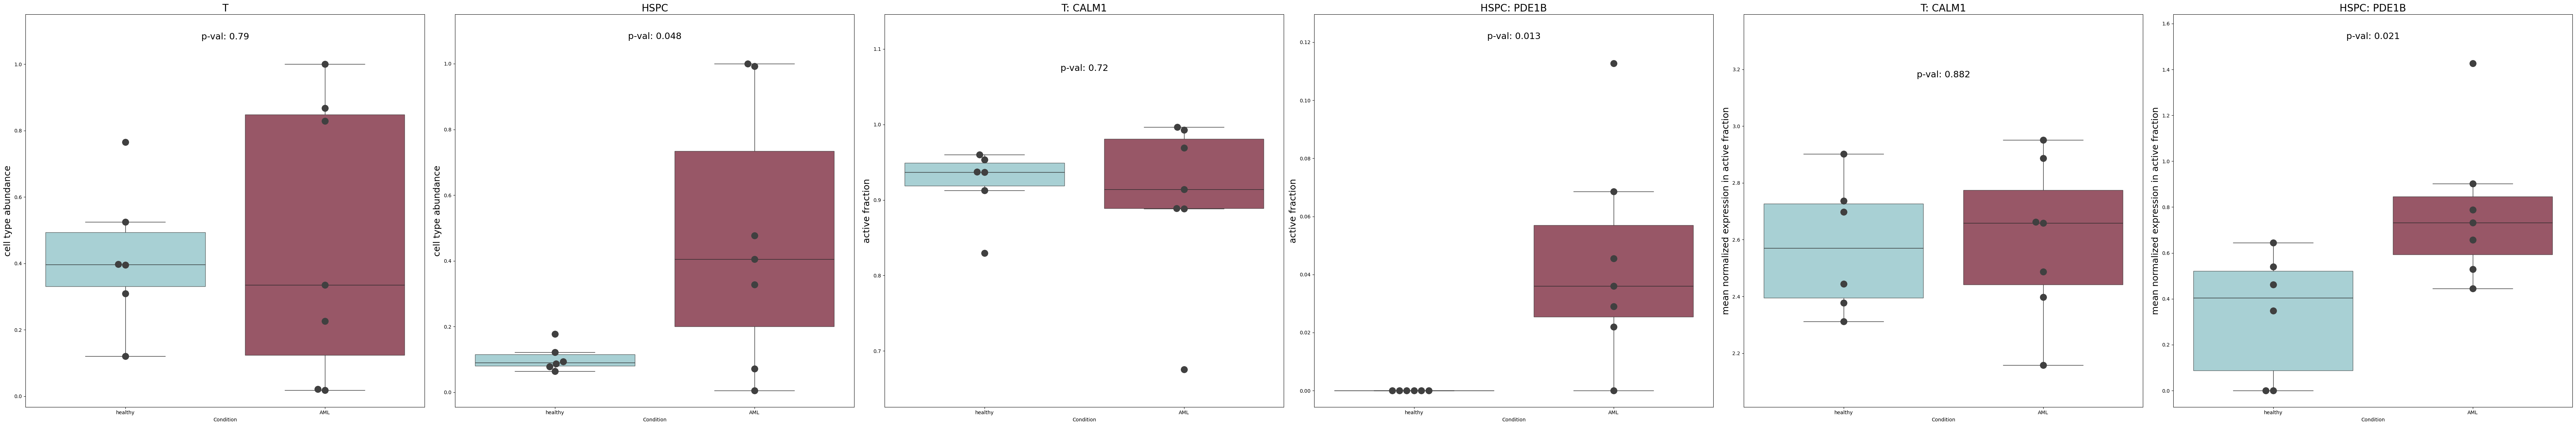

In [7]:
interaction_name_variable = "T:CALM1_HSPC:PDE1B"
plot_interaction(interaction_name_variable, df_rho_s, df_rho_r, df_a_s, df_a_r, df_e_s_l, df_e_r_r)

/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, ax=ax, order = condition_order)
/tmp/ipykernel_72612/2890659744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

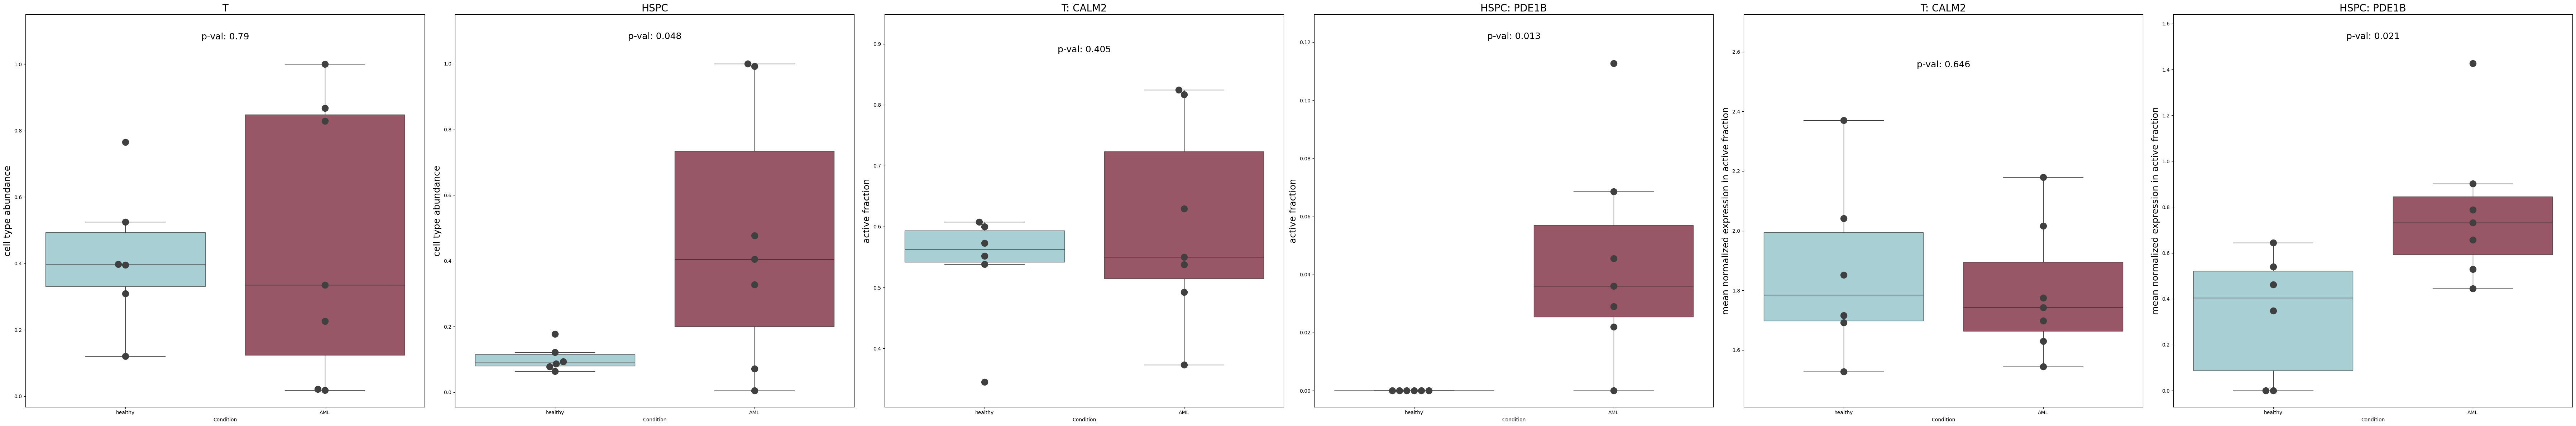

In [8]:
interaction_name_variable = "T:CALM2_HSPC:PDE1B"
plot_interaction(interaction_name_variable, df_rho_s, df_rho_r, df_a_s, df_a_r, df_e_s_l, df_e_r_r)

In [7]:
df_rho_s

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
Mono:JAG2_Mono:NOTCH1,1.00000,0.761547,0.079449,0.117983,0.011551,0.217640,0.097197,0.444525,0.642829,0.276820,0.336190,0.494811,0.489471
Mono:DLL1_Mono:NOTCH1,1.00000,0.761547,0.079449,0.117983,0.011551,0.217640,0.097197,0.444525,0.642829,0.276820,0.336190,0.494811,0.489471
Mono:IGF1_Mono:IGF1R,1.00000,0.761547,0.079449,0.117983,0.011551,0.217640,0.097197,0.444525,0.642829,0.276820,0.336190,0.494811,0.489471
Mono:JAG1_Mono:NOTCH1,1.00000,0.761547,0.079449,0.117983,0.011551,0.217640,0.097197,0.444525,0.642829,0.276820,0.336190,0.494811,0.489471
Mono:CCL3L1_Mono:CCR5,1.00000,0.761547,0.079449,0.117983,0.011551,0.217640,0.097197,0.444525,0.642829,0.276820,0.336190,0.494811,0.489471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DC:ZNRF3_DC:FZD5,0.00898,0.629858,0.111588,0.539508,0.000000,0.040458,0.244810,0.672243,1.000000,0.313782,0.353577,0.569455,0.602213
DC:ZNRF3_DC:FZD6,0.00898,0.629858,0.111588,0.539508,0.000000,0.040458,0.244810,0.672243,1.000000,0.313782,0.353577,0.569455,0.602213
DC:ZNRF3_DC:LRP6,0.00898,0.629858,0.111588,0.539508,0.000000,0.040458,0.244810,0.672243,1.000000,0.313782,0.353577,0.569455,0.602213
DC:FLT1_DC:NRP1,0.00898,0.629858,0.111588,0.539508,0.000000,0.040458,0.244810,0.672243,1.000000,0.313782,0.353577,0.569455,0.602213


In [22]:
df_rho_r.index[0].split("_")[0].split(":")[0]

'Mono'

In [24]:
unique_cell_types = set()

for index_str in df_rho_r.index:
    # Extract the cell type from the index string
    cell_type = index_str.split("_")[0].split(":")[0]
    # Add the cell type to the set
    unique_cell_types.add(cell_type)

print(unique_cell_types)

{'Mono', 'T', 'DC', 'NK', 'B', 'Gran', 'Ery', 'HSPC'}


In [79]:
def boxplot_rho(df, cell_type):
    int_id = df.index[df.index.str.startswith(cell_type)].tolist()[0]
    subset_df = df_rho_s.loc[df_rho_s.index == int_id].T
    subset_df.columns = ["Value"]
    subset_df["Condition"] = ["healthy" if "healthy" in index else "AML" for index in subset_df.index]
    group1 = subset_df[subset_df['Condition'] == 'healthy']['Value']
    group2 = subset_df[subset_df['Condition'] == 'AML']['Value']
    t_stat, p_value = ttest_ind(group1, group2)
    
    condition_order = ["healthy", "AML"]
    
    sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)
    sns.swarmplot(x='Condition', y='Value', data=subset_df, color='.25', size=14, order=condition_order)
    
    plt.title(f"Cell Type: {cell_type}")
    
    # Calculate the position for the p-value text
    x_position = 0.5  # Center of the x-axis
    y_position = subset_df['Value'].max() * 1.2  # A bit above the maximum value in the plot
    
    # Add the p-value text to the plot
    plt.text(x_position, y_position, f"p-value = {p_value:.4f}", ha='center')

    
    plt.show()

/tmp/ipykernel_73455/3498396737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)


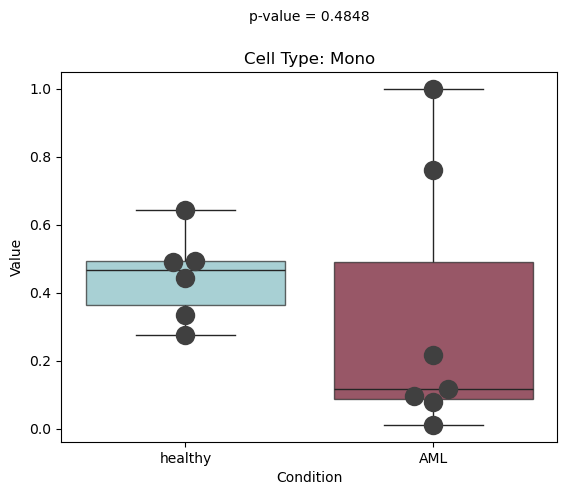

/tmp/ipykernel_73455/3498396737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)


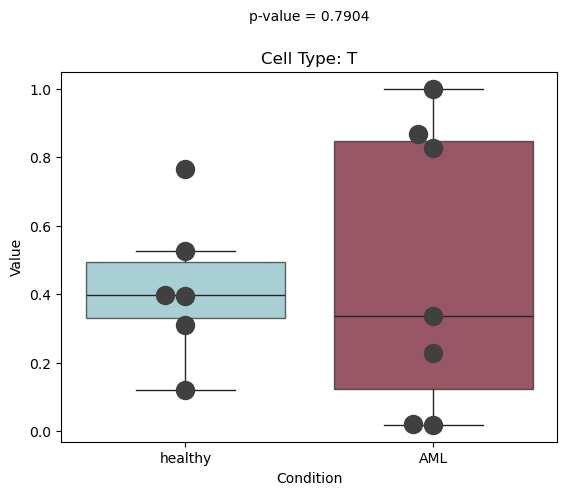

/tmp/ipykernel_73455/3498396737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)


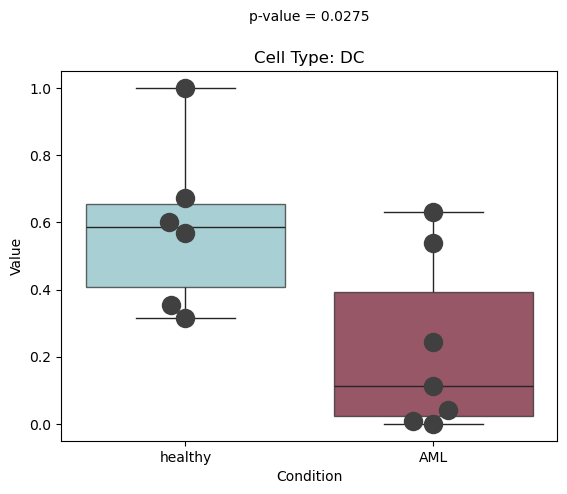

/tmp/ipykernel_73455/3498396737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)


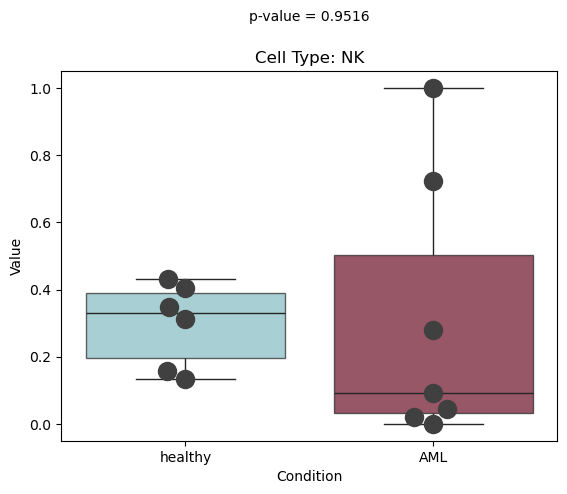

/tmp/ipykernel_73455/3498396737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)


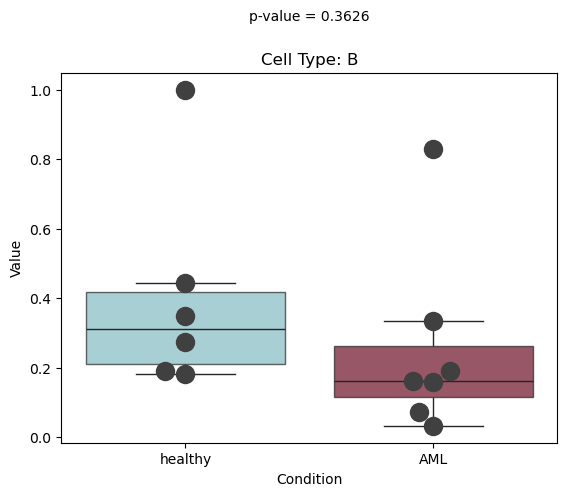

/tmp/ipykernel_73455/3498396737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)


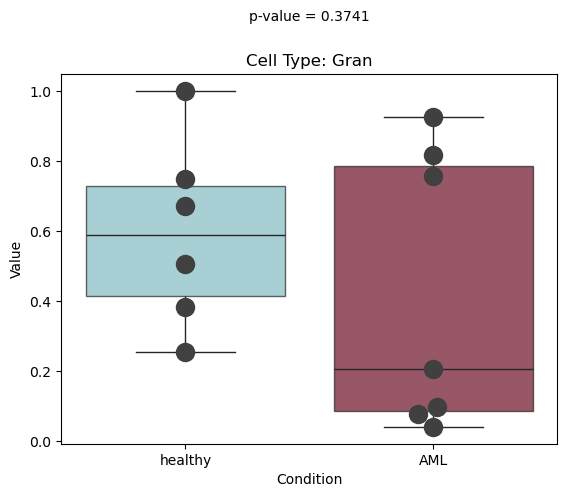

/tmp/ipykernel_73455/3498396737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)


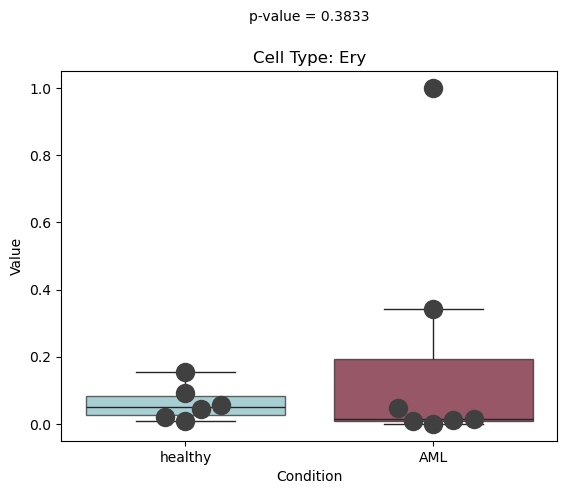

/tmp/ipykernel_73455/3498396737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)


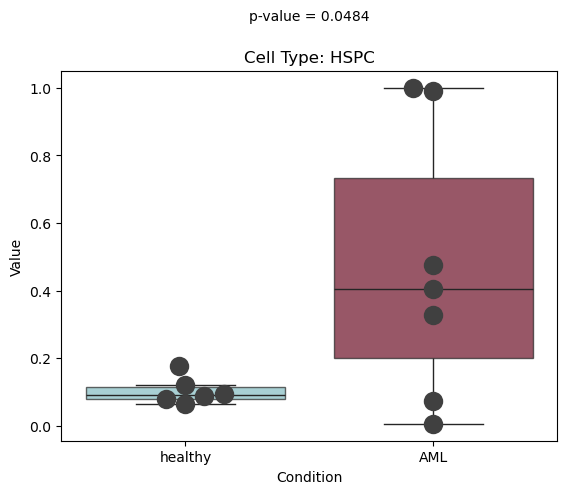

In [83]:
for cell_type in unique_cell_types:
    boxplot_rho(df_rho_r, cell_type)